In [11]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import matplotlib.pyplot as plt
import seaborn as sns



# Load your CSV data
data = pd.read_csv('online_retail_II.csv')

data.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [12]:
from surprise import Dataset, Reader

# Load your CSV data
data = pd.read_csv('online_retail_II.csv')

# Select relevant columns
data = data[['Customer ID', 'StockCode', 'Quantity']]

# Define the rating scale
reader = Reader(rating_scale=(data['Quantity'].min(), data['Quantity'].max()))

# Load data into Surprise format
data = Dataset.load_from_df(data, reader)


In [13]:


# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)

# Build the recommendation model (SVD algorithm)
model = SVD()
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model
accuracy.rmse(predictions)

# Function to get recommendations for a given user
def get_recommendations(user_id, n=5):
    user_items = data.df[data.df['Customer ID'] == user_id]['StockCode'].unique()
    all_items = data.df['StockCode'].unique()

    # Get items that the user has not purchased
    items_to_predict = [item for item in all_items if item not in user_items]

    # Make predictions for the user on items not purchased
    test_data = [(user_id, item, 0) for item in items_to_predict]
    predictions = model.test(test_data)

    # Get top n recommendations
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    # Get StockCode of recommended items
    recommended_items = [item.iid for item in top_n]

    return recommended_items

# Example usage
user_id = 123  # Replace with the actual user ID
recommendations = get_recommendations(user_id)
print("Top 5 recommendations for user {}: {}".format(user_id, recommendations))

RMSE: 80809.6931
Top 5 recommendations for user 123: ['85048', '79323P', '79323W', '22041', '21232']


In [14]:
# Example usage for multiple customer IDs
customer_ids = [123, 456, 789]

for user_id in customer_ids:
    recommendations = get_recommendations(user_id)
    print("Top 5 recommendations for user {}: {}".format(user_id, recommendations))


Top 5 recommendations for user 123: ['85048', '79323P', '79323W', '22041', '21232']
Top 5 recommendations for user 456: ['85048', '79323P', '79323W', '22041', '21232']
Top 5 recommendations for user 789: ['85048', '79323P', '79323W', '22041', '21232']


/Users/faizazizan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faizazizan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


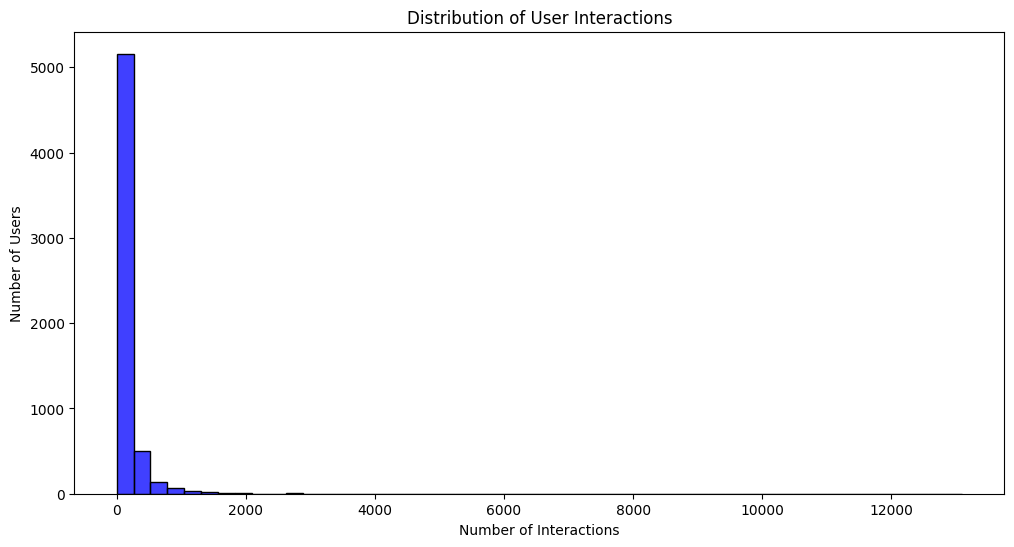

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    80809.072480812.589180805.671080807.033980807.461480808.36562.3744  
Fit time          5.99    6.06    6.07    6.54    6.28    6.19    0.20    
Test time         0.84    0.80    0.81    0.90    0.81    0.83    0.04    


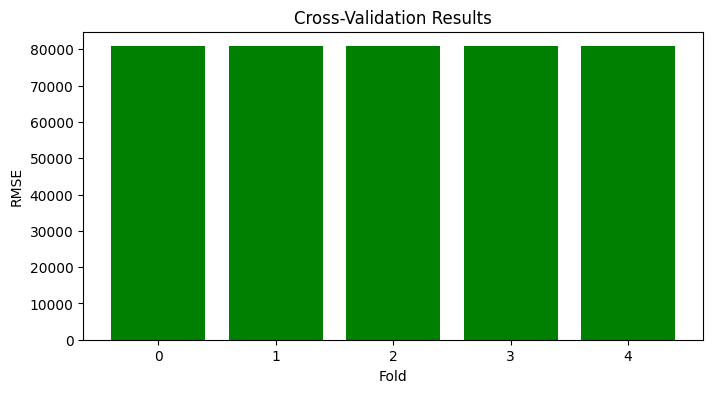

In [16]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, cross_validate
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('online_retail_II.csv')

# Select relevant columns
data = data[['Customer ID', 'StockCode', 'Quantity']]

# Load data into Surprise format
reader = Reader(rating_scale=(data['Quantity'].min(), data['Quantity'].max()))
data = Dataset.load_from_df(data, reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)

# Build the recommendation model (SVD algorithm)
model = SVD()
model.fit(trainset)

# Visualize the distribution of user interactions
plt.figure(figsize=(12, 6))
sns.histplot(data.df['Customer ID'].value_counts(), bins=50, kde=False, color='blue')
plt.title('Distribution of User Interactions')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

# Cross-validate the model and visualize the results
cv_results = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

# Plot the cross-validation results
plt.figure(figsize=(8, 4))
plt.bar(range(len(cv_results['test_rmse'])), cv_results['test_rmse'], color='green')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation Results')
plt.show()


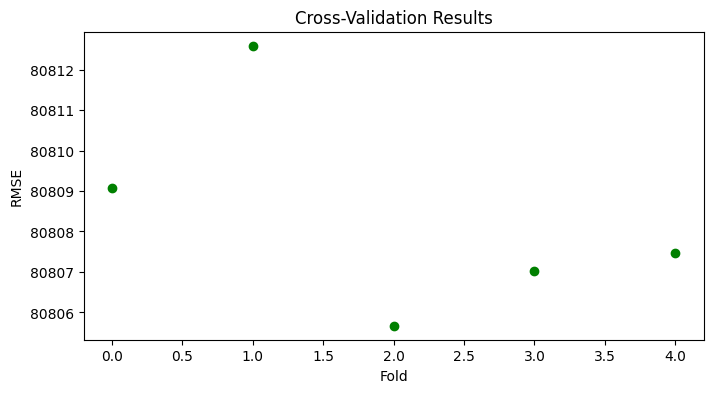

In [17]:
# Scatter plot for cross-validation results
plt.figure(figsize=(8, 4))
plt.scatter(range(len(cv_results['test_rmse'])), cv_results['test_rmse'], color='green')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation Results')
plt.show()

In [20]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('online_retail_II.csv')

# Select relevant columns
data = data[['Customer ID', 'StockCode', 'Quantity']]

# Load data into Surprise format
reader = Reader(rating_scale=(data['Quantity'].min(), data['Quantity'].max()))
data = Dataset.load_from_df(data, reader)

# Build the recommendation model (SVD algorithm)
trainset, testset = train_test_split(data, test_size=0.25)
model = SVD()
model.fit(trainset)

# Function to get recommendations for a given user
def get_recommendations_df(user_id, n=5):
    user_items = data.df[data.df['Customer ID'] == user_id]['StockCode'].unique()
    all_items = data.df['StockCode'].unique()

    # Get items that the user has not purchased
    items_to_predict = [item for item in all_items if item not in user_items]

    # Make predictions for the user on items not purchased
    test_data = [(user_id, item, 0) for item in items_to_predict]
    predictions = model.test(test_data)

    # Get top n recommendations
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    # Get StockCode of recommended items
    recommended_items = [item.iid for item in top_n]

    return pd.DataFrame({'Customer ID': [user_id] * n, 'Recommended Item': recommended_items})

# Example usage
customer_ids = [123, 456, 789]

# Create an empty DataFrame to store recommendations
recommendations_df = pd.DataFrame(columns=['Customer ID', 'Recommended Item'])

# Populate the DataFrame with recommendations
for user_id in customer_ids:
    recommendations_df = pd.concat([recommendations_df, get_recommendations_df(user_id)])

# Display the recommendations table
print(recommendations_df)


  Customer ID Recommended Item
0         123            85048
1         123           79323P
2         123           79323W
3         123            22041
4         123            21232
0         456            85048
1         456           79323P
2         456           79323W
3         456            22041
4         456            21232
0         789            85048
1         789           79323P
2         789           79323W
3         789            22041
4         789            21232
